In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 30 15:32:25 2017

@author: kouui
"""


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import pickle
%matplotlib notebook

<IPython.core.display.Javascript object>


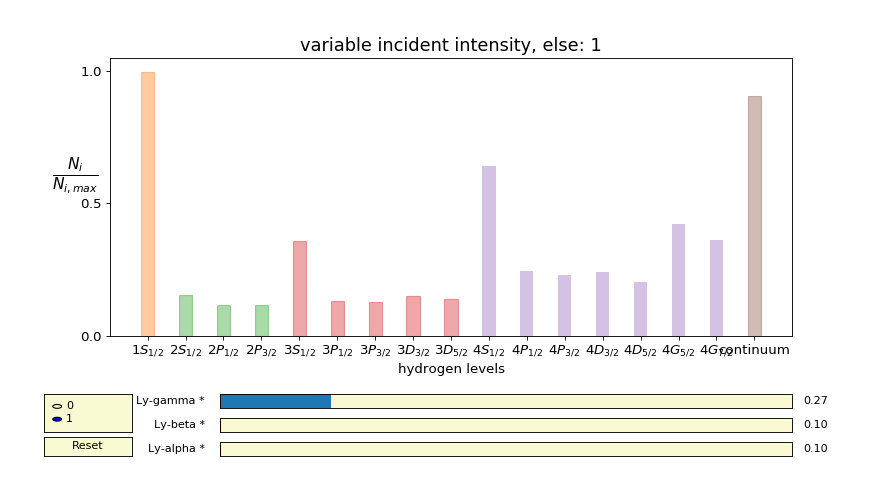

In [9]:
with open ('./variation.pickle', 'rb') as handle:
    data0 = pickle.load(handle)
    
data_used = {}
data_used['1'] = data0['HNs: lya and lyb and lyr and 1']
data_used['0'] = data0['HNs: lya and lyb and lyr and 0']

data = data_used['1']
    
fig = plt.figure(figsize=(11,6), dpi=80)
ax = fig.add_subplot(1,1,1)
plt.subplots_adjust(bottom=0.3)

index = np.arange(17)
bar_width = 0.35
opacity = 0.4
factor = 0.1
#depth = int(factor * 100)
#gamma_index = int(factor*10)-1
maxi = np.amax(data, (0,1))
y = data[0, 0, :] / maxi

rects1 = ax.bar(index, y, bar_width, alpha=opacity, color='C4')
rects1[0].set_color('C1')
for bar in rects1[1:4]:
    bar.set_color('C2')
for bar in rects1[4:9]:
    bar.set_color('C3')
rects1[-1].set_color('C5')

ax.set_ylabel(r'$\frac{N_i}{{N_{i,max}}}$', fontsize=20, rotation='horizontal')
ax.set_xlabel('hydrogen levels', fontsize=12)
ax.set_title('variable incident intensity, else: 1', fontsize=16)
ax.set_xticks(index) #+ bar_width / 2)
label = ('$1S_{1/2}$', '$2S_{1/2}$', '$2P_{1/2}$', '$2P_{3/2}$',
         '$3S_{1/2}$','$3P_{1/2}$','$3P_{3/2}$','$3D_{3/2}$','$3D_{5/2}$',
         '$4S_{1/2}$','$4P_{1/2}$','$4P_{3/2}$','$4D_{3/2}$',
         '$4D_{5/2}$','$4G_{5/2}$','$4G_{7/2}$', 'continuum')
ax.set_xticklabels(label, fontsize=12)
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(('$0.0$', '$0.5$', '$1.0$'), fontsize=12)


axcolor = 'lightgoldenrodyellow'
ax_factor1 = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)
s_factor1 = Slider(ax_factor1, 'Ly-alpha * ', valmin=0.1, valmax=1.0, 
                   valfmt="%.2f", valinit=factor)
ax_factor2 = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
s_factor2 = Slider(ax_factor2, 'Ly-beta * ', valmin=0.1, valmax=1.0, 
                   valfmt="%.2f", valinit=factor)
ax_factor3 = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
s_factor3 = Slider(ax_factor3, 'Ly-gamma * ', valmin=0.1, valmax=1.0, 
                   valfmt="%.2f", valinit=factor)

def update(val):
    fac1 = s_factor1.val
    fac2 = s_factor2.val
    fac3 = s_factor3.val
    gamma_ind = int(fac3*10)-1
    dep = (int(fac1*10)-1)*10 + (int(fac2*10)-1)
    print('alpha : ', fac1, 'beta : ', fac2, 'gamma : ', 
          fac3, 'gamma factor : ', int(fac3*10)/10, 
          'dep : ', dep)
    yy = data[gamma_ind, dep, :] / maxi
    for rect, h in zip(rects1, yy):
        rect.set_height(h)
    fig.canvas.draw_idle()
s_factor1.on_changed(update)
s_factor2.on_changed(update)
s_factor3.on_changed(update)

resetax = plt.axes([0.05, 0.05, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
def reset(event):
    s_factor1.reset()
    s_factor2.reset()
    s_factor3.reset()
button.on_clicked(reset)


rax = plt.axes([0.05, 0.1, 0.1, 0.08], facecolor=axcolor)
radio = RadioButtons(rax, ('0', '1'), active=1)
def one_or_zero(label):
    global data, maxi
    data = data_used[label]
    maxi = np.amax(data, (0,1))
    fig.canvas.draw_idle()
radio.on_clicked(one_or_zero)

plt.show()